---
title: networkx入门
date: 2018-09-19 20:17:55
tags: [networkx]
toc: true
xiongzhang: false

---
<span></span>
<!-- more -->


本文代码运行环境:

- windows10
- python3.6

这篇教程可以帮助您开始使用python NetworkX。NetworkX是一个Python包，用于创建，操作和研究复杂网络的结构，动态和功能。

NetworkX提供：

- 研究社会，生物和基础设施网络的结构和动态的工具;
- 适用于许多应用的标准编程接口和图形实现;
- 一个快速发展的多学科项目的环境;
- 现有数值算法的接口和用C，C ++和FORTRAN编写的代码;和
- 能够无痛地处理大型非标准数据集。
- 使用NetworkX，您可以以标准和非标准数据格式加载和存储网络，生成多种类型的随机和经典网络，分析网络结构，构建网络模型，设计新的网络算法，绘制网络等等。

### 创建图

创建一个空图:

In [1]:
import networkx as nx
g = nx.Graph()

根据定义，Graph是节点（顶点）的集合以及标识的节点对（称为边，链接等）。在NetworkX中，节点可以是任何可hashable对象，例如文本字符串，图像，XML对象，另一个图Graph，定制节点对象等。

### 节点

图可以以几种方式生长。 NetworkX包含许多图生成器功能和工具，可以以多种格式读写图形。为了开始，我们将看看简单的操作。您可以一次添加一个节点，

In [2]:
g.add_node('Node-1')

一次添加多个节点:

In [3]:
g.add_nodes_from(['Node-2', 'Node-3'])

在添加节点的时候, 你还可以添加节点的属性, 只要传入一个tuple: (node, node_attribute_dict)

In [5]:
g.add_nodes_from([('Node-4', {'id':1, 'operation': 'add'})])

我们在之后的教程中会继续讨论节点的属性。

我们还可直接添加其他图的节点:

In [6]:
h = nx.path_graph(10)
g.add_nodes_from(h)

现在图g包含了图h, 也就是图h实际上图g的一个节点。

### 边

图也可以通过增加边来生长:

In [7]:
g.add_edge(1,2)

也可以一次添加多个边:

In [8]:
g.add_edges_from([(1, 2), (1, 3)])

也可以从其他图中添加边:

In [9]:
g.add_edges_from(h.edges)

当添加的边包含不存在的节点的时候, 程序并不会报错:

In [10]:
g.add_edge(1000, 100000)

目前为止, 查看一下图中到底有多少个节点和边:

In [11]:
g.number_of_nodes()

16

In [12]:
g.number_of_edges()

11

我们可以通过各种属性查看图的内部结构。四个基本图形属性有：G.nodes，G.edges，G.adj和G.degree。这些是图中节点，边，邻居（邻接）和节点度的集合。它们为图形结构提供了不断更新的只读视图。它们也类似于dict，因为您可以通过视图查找节点和边缘数据属性，并使用方法`.items`,`. data=（'span'）`迭代数据属性。如果您想要特定的容器类型而不是视图，则可以指定一个。这里我们使用列表，虽然`set，dicts，tuple`和其他容器在其他上下文中可能更好。

In [13]:
g.nodes

NodeView(('Node-1', 'Node-2', 'Node-3', 'Node-4', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1000, 100000))

In [14]:
g.edges

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (1000, 100000)])

In [15]:
g.adj

AdjacencyView({'Node-1': {}, 'Node-2': {}, 'Node-3': {}, 'Node-4': {}, 0: {1: {}}, 1: {2: {}, 3: {}, 0: {}}, 2: {1: {}, 3: {}}, 3: {1: {}, 2: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {4: {}, 6: {}}, 6: {5: {}, 7: {}}, 7: {6: {}, 8: {}}, 8: {7: {}, 9: {}}, 9: {8: {}}, 1000: {100000: {}}, 100000: {1000: {}}})

In [16]:
g.degree

DegreeView({'Node-1': 0, 'Node-2': 0, 'Node-3': 0, 'Node-4': 0, 0: 1, 1: 3, 2: 2, 3: 3, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 1, 1000: 1, 100000: 1})

### 图可视化

NetworkX主要不是图形绘图包，但包含使用Matplotlib的基本绘图以及使用开源Graphviz软件包的接口。这些是networkx.drawing模块的一部分，如果已经安装在环境中, 可以将他们导入进来。

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

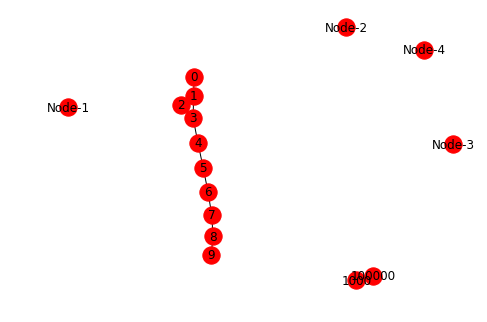

In [19]:
nx.draw(g, with_labels=True)

上面的图片看起来有点丑, 因为缺少必要的边把节点连起来。以后的教程中会专门介绍图的绘制。

### 删除节点和边


你可以一次清理掉所有的边和节点, 不过这好像没有什么用:

In [20]:
g.clear()

当然可以单独删除一个或者多个节点, 当节点不存在的时候, 会报错:

In [22]:
g.remove_node(2)
g.remove_nodes_from([2,3,4])

NetworkXError: The node 2 is not in the graph.

In [24]:
g.add_node(1)
g.add_node(2)
g.remove_nodes_from([1,2])

### 使用边和邻居节点

上面有讲使用`Graph.edges`和`Graph.adj`来获取边和邻居节点, 不过我们还能使用切片的方式:

In [27]:
g.add_node(1)
g.add_node(2)
g.add_edge(1,2)

获取节点1的邻居节点:

In [28]:
g[1]

AtlasView({2: {}})

获取边:

In [30]:
g.edges[1,2]

{}

你可以设置边的属性:

In [34]:
g.edges[1, 2]['color'] = 'red'

你可以以循环的方式输出所有的节点对, 你可以:

In [35]:
for n, nbs in g.adj.items():
    print(nbs)

{2: {'color': 'red'}}
{1: {'color': 'red'}}


### 有向图

DiGraph类提供特定于有向边的附加属性，例如`DiGraph.out_edges（）`，`DiGraph.in_degree（）`，`DiGraph.predecessors（）`，`DiGraph.successors（）`等。为了使算法能够轻松地处理这两个类， `neighbor（）`的功能等同于`successors（）`，而`degree`会报告`in_degree`和`out_degree`的总和，即使有时可能会感觉不一致。

In [36]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
dg.out_degree(1, weight='weight')

0.5

In [45]:
dg.nodes

NodeView((1, 2, 3))

获取节点1的子节点:

In [48]:
list(dg.successors(1))

[2]

获取节点1的父节点:

In [49]:
list(dg.predecessors(1))

[3]

在有向图中, `successors`和`neightbors`有相同的功能:

In [47]:
list(dg.successors(1)) == list(dg.neighbors(1))

True

绘制有向图:

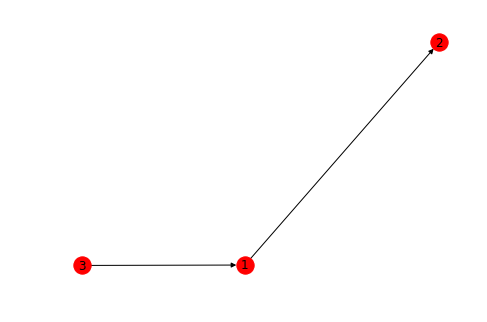

In [50]:
nx.draw(dg, with_labels=True)

### 利用有向图实现计算图

类似tensorflow那样的计算图, 可以使用networkx来做一个原型, 这样我们可以把数据计算的流程可视化了:

In [71]:
dg.clear()
nodes1 = [
    ('Variable', {'name': 'avariable', 'table': 'tablename'}),
    ('Select', {'conditions': {'pro_code': 44}}),
    ('GroupBy', {'varname': 'gender'}),
    ('Mean', {}),
    ('Which1', {'level': 1}),
    ('Decimal1', {'place': 1}),
]

nodes2 = [
    ('Which1', {'level': 2}),
    ('Decimal2', {'place': 1}),
]

nodes3 = [
    ('Add', {})
]

dg.add_nodes_from(nodes1)
dg.add_nodes_from(nodes2)
dg.add_nodes_from(nodes3)

In [72]:
dg.add_edges_from([
    ('Variable', 'Select'),
    ('Select', 'GroupBy'),
    ('GroupBy', 'Mean'),
    ('Mean', 'Which1'),
    ('Mean', 'Which2'),
    ('Which1', 'Decimal1'),
    ('Which2', 'Decimal2'),
    ('Decimal1', 'Add'),
    ('Decimal2', 'Add'),
])

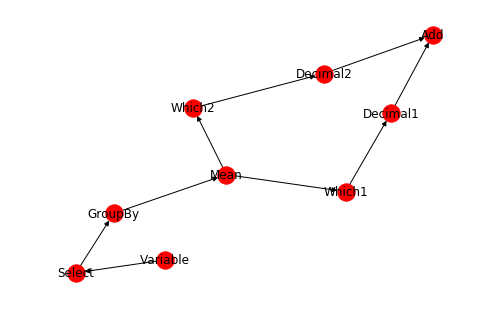

In [78]:
nx.draw(dg, with_labels=True)

In [96]:
class Node:
    def __hash__(self):
        return hash((1, 2))

In [97]:
n1=Node()

In [98]:
g.clear()

In [99]:
g.add_node(n1)

In [100]:
nx.node_link_data(g)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': <__main__.Node at 0x17b6a1f84a8>}],
 'links': []}